# Capstone Project OECD Cancer Data and Machine Learning

### Import Necessary Libraries

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read CSV and Determine Column Names for Cleaning

In [130]:
OECD = pd.read_csv('OECDHEALTHDATA.csv')

print(OECD.columns)

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'FREQ', 'Frequency of observation', 'MEASURE',
       'Measure', 'UNIT_MEASURE', 'Unit of measure', 'AGE', 'Age', 'SEX',
       'Sex', 'SOCIO_ECON_STATUS', 'Socio-economic status', 'DEATH_CAUSE',
       'Cause of death', 'CALC_METHODOLOGY', 'Calculation methodology',
       'GESTATION_THRESHOLD', 'Gestation period threshold', 'HEALTH_STATUS',
       'Health status', 'DISEASE', 'Disease', 'CANCER_SITE', 'Cancer site',
       'TIME_PERIOD', 'Time period', 'OBS_VALUE', 'Observation value',
       'DECIMALS', 'Decimals', 'OBS_STATUS', 'Observation status',
       'OBS_STATUS2', 'Observation status 2', 'OBS_STATUS3',
       'Observation status 3', 'UNIT_MULT', 'Unit multiplier'],
      dtype='object')


### Drop unecessary columns

In [131]:
# drop features
OECD_cleaned = OECD.drop(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'FREQ', 'Frequency of observation', 'MEASURE',
       'Measure', 'UNIT_MEASURE', 'Unit of measure', 'AGE', 'Age', 'SEX', 'SOCIO_ECON_STATUS', 'Socio-economic status', 'DEATH_CAUSE',
       'Cause of death', 'CALC_METHODOLOGY', 'Calculation methodology',
       'GESTATION_THRESHOLD', 'Gestation period threshold', 'HEALTH_STATUS',
       'Health status', 'DISEASE', 'Disease', 'CANCER_SITE','Time period', 'Observation value',
       'DECIMALS', 'Decimals', 'OBS_STATUS', 'Observation status',
       'OBS_STATUS2', 'Observation status 2', 'OBS_STATUS3',
       'Observation status 3', 'UNIT_MULT', 'Unit multiplier'], axis=1)

# rename features
OECD_cleaned = OECD_cleaned.rename(columns={'OBS_VALUE' : 'Cancer Rate', 'TIME_PERIOD' : 'Year', 'Reference area' : 'Country'})


# Print the result

#check that correct columns were dropped
OECD_cleaned.head(10)

,Country,Sex,Cancer site,Year,Cancer Rate
0,Slovak Republic,Female,Malignant neoplasms of female breast,2002,48.0
1,Slovak Republic,Female,Malignant neoplasms of female breast,2008,53.4
2,Slovak Republic,Female,Malignant neoplasms of female breast,2012,57.5
3,Iceland,Male,"Malignant neoplasms of trachea, bronchus, lung",2002,30.0
4,Iceland,Male,"Malignant neoplasms of trachea, bronchus, lung",2008,29.3
5,Iceland,Male,"Malignant neoplasms of trachea, bronchus, lung",2012,31.0
6,Sweden,Female,Malignant neoplasms of female breast,2000,81.0
7,Sweden,Female,Malignant neoplasms of female breast,2002,87.8
8,Sweden,Female,Malignant neoplasms of female breast,2008,82.7
9,Sweden,Female,Malignant neoplasms of female breast,2012,80.4


In [132]:
#determine the range of time covered

year_values = OECD_cleaned['Year'].unique()
min_year = min(year_values)
max_year = max(year_values)

#The countires included

countries = OECD_cleaned['Country'].unique()

#Types of cancer

cancers = OECD_cleaned['Cancer site'].unique()

#print resluts

print(f"Range of Years: {min_year} to {max_year}")
print(countries)
print(cancers)

Range of Years: 2000 to 2012
['Slovak Republic' 'Iceland' 'Sweden' 'Austria' 'France' 'Colombia'
 'Estonia' 'United Kingdom' 'Korea' 'Italy' 'Netherlands' 'Brazil'
 'Indonesia' 'United States' 'Czechia' 'Australia' 'Luxembourg' 'Canada'
 'Denmark' 'South Africa' 'Ireland' 'Costa Rica' 'India' 'Lithuania'
 'Hungary' 'Türkiye' 'Belgium' 'Spain' 'Russia' 'Latvia' 'Switzerland'
 'Portugal' 'Finland' 'Poland' 'Greece' 'Israel' 'Mexico' 'Slovenia'
 'China (People’s Republic of)' 'New Zealand' 'Japan' 'Chile' 'Germany'
 'Norway']
['Malignant neoplasms of female breast'
 'Malignant neoplasms of trachea, bronchus, lung' 'Malignant neoplasms'
 'Malignant neoplasms of colon, rectum and anus'
 'Malignant neoplasms of cervix uteri' 'Malignant neoplasms of prostate']


### Keep only total rows, sex specific cancer rows will have 'sex' field updated to say 'Total'

In [133]:


# Update fields in the "Sex" column to say "Total" for the sex specific cancers
OECD_cleaned.loc[OECD_cleaned['Cancer site'] == 'Malignant neoplasms of prostate', 'Sex'] = 'Total'
OECD_cleaned.loc[OECD_cleaned['Cancer site'] == 'Malignant neoplasms of female breast', 'Sex'] = 'Total'
OECD_cleaned.loc[OECD_cleaned['Cancer site'] == 'Malignant neoplasms of cervix uteri', 'Sex'] = 'Total'
# Print the updated DataFrame
print(OECD_cleaned)


              Country    Sex                                     Cancer site  \
0     Slovak Republic  Total            Malignant neoplasms of female breast   
1     Slovak Republic  Total            Malignant neoplasms of female breast   
2     Slovak Republic  Total            Malignant neoplasms of female breast   
3             Iceland   Male  Malignant neoplasms of trachea, bronchus, lung   
4             Iceland   Male  Malignant neoplasms of trachea, bronchus, lung   
...               ...    ...                                             ...   
1483      New Zealand  Total  Malignant neoplasms of trachea, bronchus, lung   
1484      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   
1485      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   
1486      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   
1487      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   

      Year  Cancer Rate  
0     2002   

### Keep only rows that are totals 

In [134]:
OECD_filtered = OECD_cleaned[OECD_cleaned['Sex'] == 'Total']

print(OECD_filtered)

              Country    Sex                                     Cancer site  \
0     Slovak Republic  Total            Malignant neoplasms of female breast   
1     Slovak Republic  Total            Malignant neoplasms of female breast   
2     Slovak Republic  Total            Malignant neoplasms of female breast   
6              Sweden  Total            Malignant neoplasms of female breast   
7              Sweden  Total            Malignant neoplasms of female breast   
...               ...    ...                                             ...   
1483      New Zealand  Total  Malignant neoplasms of trachea, bronchus, lung   
1484      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   
1485      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   
1486      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   
1487      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   

      Year  Cancer Rate  
0     2002   

In [135]:
# countries that that are missing too many years will have to be excluded for the model
# determine the number of entries per country 


# Group the DataFrame by 'Reference area' and count the number of entries for each group
entries_per_country = OECD_filtered.groupby(['Country']).size().reset_index(name='count')

# Print the result
print(entries_per_country)


                         Country  count
0                      Australia     18
1                        Austria     24
2                        Belgium     24
3                         Brazil      6
4                         Canada     18
5                          Chile     12
6   China (People’s Republic of)      6
7                       Colombia      6
8                     Costa Rica      6
9                        Czechia     18
10                       Denmark     24
11                       Estonia     12
12                       Finland     24
13                        France     24
14                       Germany     24
15                        Greece     24
16                       Hungary     18
17                       Iceland     18
18                         India      6
19                     Indonesia      6
20                       Ireland     24
21                        Israel     12
22                         Italy     24
23                         Japan     18


In [136]:
### Drop countries that have less than 18 entries

country_entry_counts = OECD_filtered['Country'].value_counts()

### Filter out countries with less than 18 entries
countries_to_keep = country_entry_counts[country_entry_counts >= 18].index.tolist()
OECD_final = OECD_filtered[OECD_filtered['Country'].isin(countries_to_keep)]

### Print the result
OECD_final.describe

<bound method NDFrame.describe of               Country    Sex                                     Cancer site  \
0     Slovak Republic  Total            Malignant neoplasms of female breast   
1     Slovak Republic  Total            Malignant neoplasms of female breast   
2     Slovak Republic  Total            Malignant neoplasms of female breast   
6              Sweden  Total            Malignant neoplasms of female breast   
7              Sweden  Total            Malignant neoplasms of female breast   
...               ...    ...                                             ...   
1483      New Zealand  Total  Malignant neoplasms of trachea, bronchus, lung   
1484      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   
1485      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   
1486      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   
1487      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   

     

In [137]:
#test that correct countries were dropped
# Group the DataFrame by 'Reference area' and count the number of entries for each group
entries_per_country2 = OECD_final.groupby(['Country']).size().reset_index(name='count')

# Print the result
print(entries_per_country2)


            Country  count
0         Australia     18
1           Austria     24
2           Belgium     24
3            Canada     18
4           Czechia     18
5           Denmark     24
6           Finland     24
7            France     24
8           Germany     24
9            Greece     24
10          Hungary     18
11          Iceland     18
12          Ireland     24
13            Italy     24
14            Japan     18
15            Korea     18
16       Luxembourg     24
17           Mexico     18
18      Netherlands     24
19      New Zealand     18
20           Norway     18
21           Poland     18
22         Portugal     24
23  Slovak Republic     18
24            Spain     24
25           Sweden     24
26      Switzerland     24
27          Türkiye     18
28   United Kingdom     24
29    United States     18


### Remove entires for the year 2000

In [138]:
# Remove all entries for the year 2000
OECD_final = OECD_final[OECD_final['Year'] != 2000]

# Print the result
OECD_final.describe


<bound method NDFrame.describe of               Country    Sex                                     Cancer site  \
0     Slovak Republic  Total            Malignant neoplasms of female breast   
1     Slovak Republic  Total            Malignant neoplasms of female breast   
2     Slovak Republic  Total            Malignant neoplasms of female breast   
7              Sweden  Total            Malignant neoplasms of female breast   
8              Sweden  Total            Malignant neoplasms of female breast   
...               ...    ...                                             ...   
1482      New Zealand  Total  Malignant neoplasms of trachea, bronchus, lung   
1483      New Zealand  Total  Malignant neoplasms of trachea, bronchus, lung   
1485      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   
1486      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   
1487      Netherlands  Total   Malignant neoplasms of colon, rectum and anus   

     

In [139]:
#drop sex feature as no longer necessary
OECD_final = OECD_final.drop(['Sex'], axis=1)

OECD_final.head(10)

,Country,Cancer site,Year,Cancer Rate
0,Slovak Republic,Malignant neoplasms of female breast,2002,48.0
1,Slovak Republic,Malignant neoplasms of female breast,2008,53.4
2,Slovak Republic,Malignant neoplasms of female breast,2012,57.5
7,Sweden,Malignant neoplasms of female breast,2002,87.8
8,Sweden,Malignant neoplasms of female breast,2008,82.7
9,Sweden,Malignant neoplasms of female breast,2012,80.4
11,Austria,Malignant neoplasms,2002,275.5
12,Austria,Malignant neoplasms,2008,250.6
13,Austria,Malignant neoplasms,2012,254.1
15,France,"Malignant neoplasms of colon, rectum and anus",2002,33.4


## Begin Exploratory Data Analysis

<Figure size 1200x600 with 0 Axes>

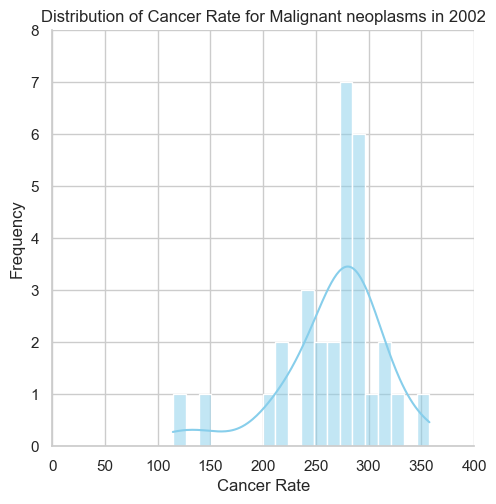

In [177]:
# Filter the DataFrame to include only data for the specific cancer and year
cancer_type = "Malignant neoplasms"
year = 2002
MN_2002 = OECD_final[(OECD_final['Cancer site'] == cancer_type) & (OECD_final['Year'] == year)]

# Create a distribution plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.displot(MN_2002, x='Cancer Rate', kde=True, color='skyblue', bins=20)
plt.title(f'Distribution of Cancer Rate for {cancer_type} in {year}')
plt.xlabel('Cancer Rate')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.ylim(0, 8)
plt.show()



<Figure size 1200x600 with 0 Axes>

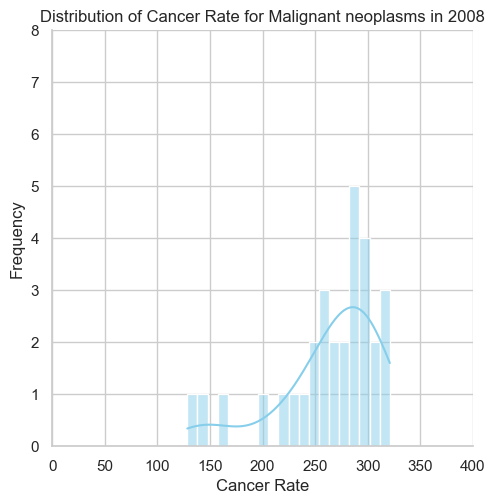

In [183]:
# Filter the DataFrame to include only data for the specific cancer and year
cancer_type = "Malignant neoplasms"
year = 2008
MN_2008 = OECD_final[(OECD_final['Cancer site'] == cancer_type) & (OECD_final['Year'] == year)]

# Create a distribution plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.displot(MN_2008, x='Cancer Rate', kde=True, color='skyblue', bins=20)
plt.title(f'Distribution of Cancer Rate for {cancer_type} in {year}')
plt.xlabel('Cancer Rate')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.ylim(0, 8)
plt.show()

<Figure size 1200x600 with 0 Axes>

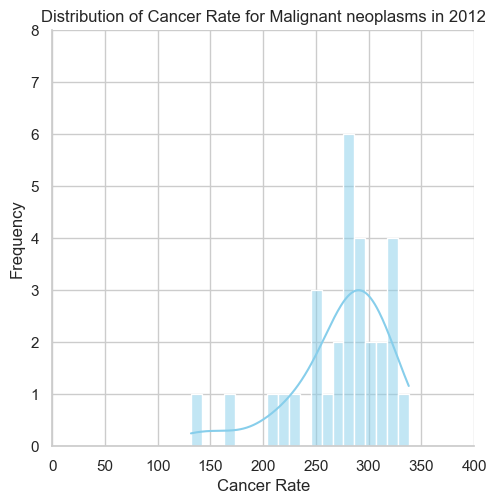

In [188]:
# Filter the DataFrame to include only data for the specific cancer and year
cancer_type = "Malignant neoplasms"
year = 2012
MN_2012 = OECD_final[(OECD_final['Cancer site'] == cancer_type) & (OECD_final['Year'] == year)]

# Create a distribution plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.displot(MN_2012, x='Cancer Rate', kde=True, color='skyblue', bins=20)
plt.title(f'Distribution of Cancer Rate for {cancer_type} in {year}')
plt.xlabel('Cancer Rate')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.ylim(0, 8)
plt.show()

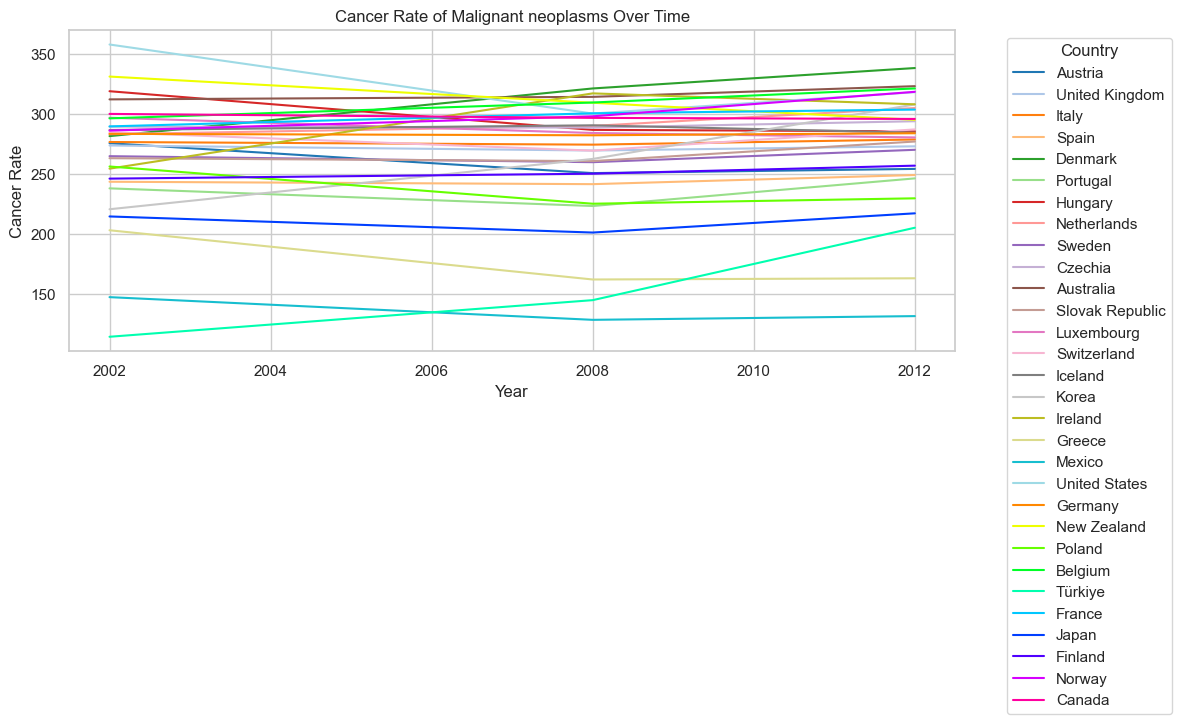

In [189]:
# Specify the cancer
cancer_type = "Malignant neoplasms"

# Create a palette with 30 distinct colors

palette = sns.color_palette("tab20", 20) + sns.color_palette("hsv", 10)

# Filter the DataFrame for the specific cancer
filtered_df = OECD_final[OECD_final['Cancer site'] == cancer_type]

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='Year', y='Cancer Rate', hue='Country', palette=palette)
plt.title(f'Cancer Rate of {cancer_type} Over Time')
plt.xlabel('Year')
plt.ylabel('Cancer Rate')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

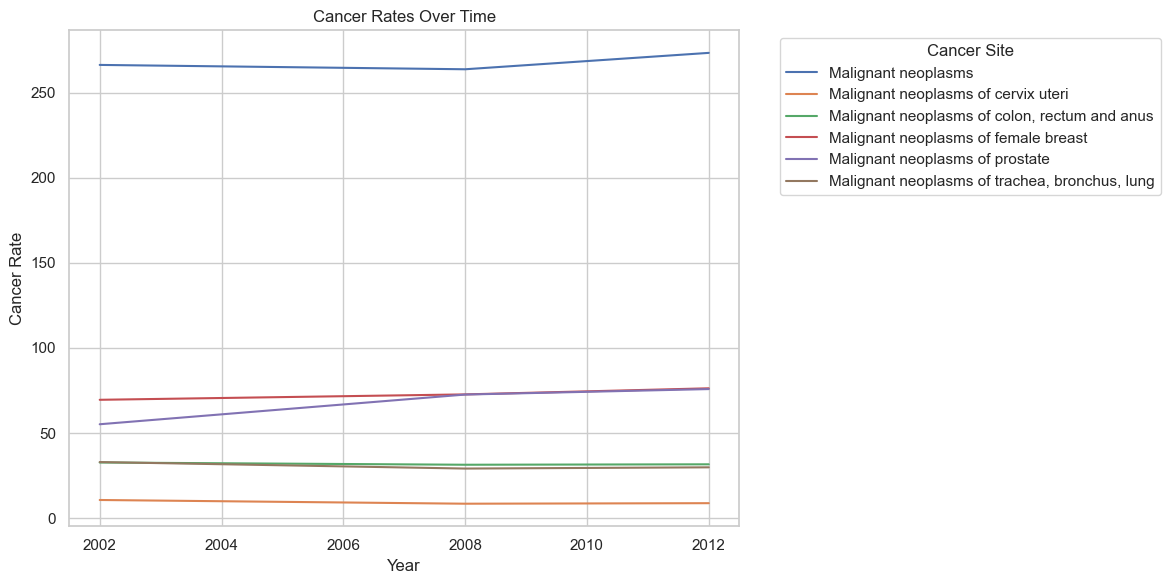

In [190]:
# Aggregate duplicate entries by calculating the mean cancer rate
aggregated_df = OECD_final.groupby(['Year', 'Cancer site'])['Cancer Rate'].mean().reset_index()

# Pivot the aggregated DataFrame
pivot_df = aggregated_df.pivot(index='Year', columns='Cancer site', values='Cancer Rate')

# Plot the line graph
plt.figure(figsize=(12, 6))
for column in pivot_df.columns:
    sns.lineplot(data=pivot_df[column], label=column, dashes=False)
plt.title('Cancer Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Cancer Rate')
plt.legend(title='Cancer Site', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [191]:
#OECD_final.to_csv('OECD_Final.csv', index=False)

## Begin Buidling Model 

In [202]:
import sklearn as skl
from sklearn.model_selection import cross_val_score

# choose relevant columns
OECD_model = OECD_final[['Country','Cancer site','Year','Cancer Rate']]

# get dummy data 
df_dum = pd.get_dummies(OECD_model)

# train test split 
from sklearn.model_selection import train_test_split

X = df_dum.drop('Cancer Rate', axis =1)
y = df_dum['Cancer Rate'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [255]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

# test ensemble 
tpred_lm = lm.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)



14.32170138888889

In [256]:
np.mean(cross_val_score(lm,X_train,y_train,scoring = 'neg_mean_squared_error', cv= 3))

-530.5104374346523

In [263]:
from sklearn.metrics import r2_score

r2_score(y_test, tpred_lm)

0.9622139916591305

In [264]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred

array([ 29.87,   5.94, 101.98,  22.06,  34.36,   6.69, 296.1 , 312.14,
        37.35,  27.99, 254.92,   8.16,  88.01,   7.82,  25.15,  43.47,
        89.79,   7.63,  92.72,  28.75,  71.86, 267.08, 298.91,   5.34,
        91.68,  69.16,  36.17,  35.72,  36.82,  81.83, 334.77,   6.7 ,
        35.7 , 182.74,  83.15,  32.27,   6.71,   7.34,  41.4 ,  33.29,
        29.22,  67.06,  10.98,  85.27,  29.34,  44.12,   6.42,  84.53,
       295.44,  10.01,  85.41,  90.22,  48.07,  36.17,   7.82,  28.65,
        38.32,  36.83, 333.35,  34.45, 289.49,  27.94,   6.83,  28.36,
        28.75,  59.32,   6.66,  10.15,  25.16,  24.09,  51.87,  35.1 ,
       297.88,  31.35,  35.22, 291.67,  37.46,  84.87,  30.98, 124.35,
        38.59,  14.51,  22.74,  52.26,  62.98,  36.43,  38.11,  14.95,
        46.07, 244.81,  51.71,  27.63,  13.05,  89.91,   5.19,  28.49,
        30.04,  91.17,  63.71,  30.08, 277.39,  37.5 ,  66.11,  52.26,
        35.55, 246.76,  89.75,  84.08])

In [265]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9768002497492271

In [266]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_squared_error', cv= 3))

-328.34274976851856

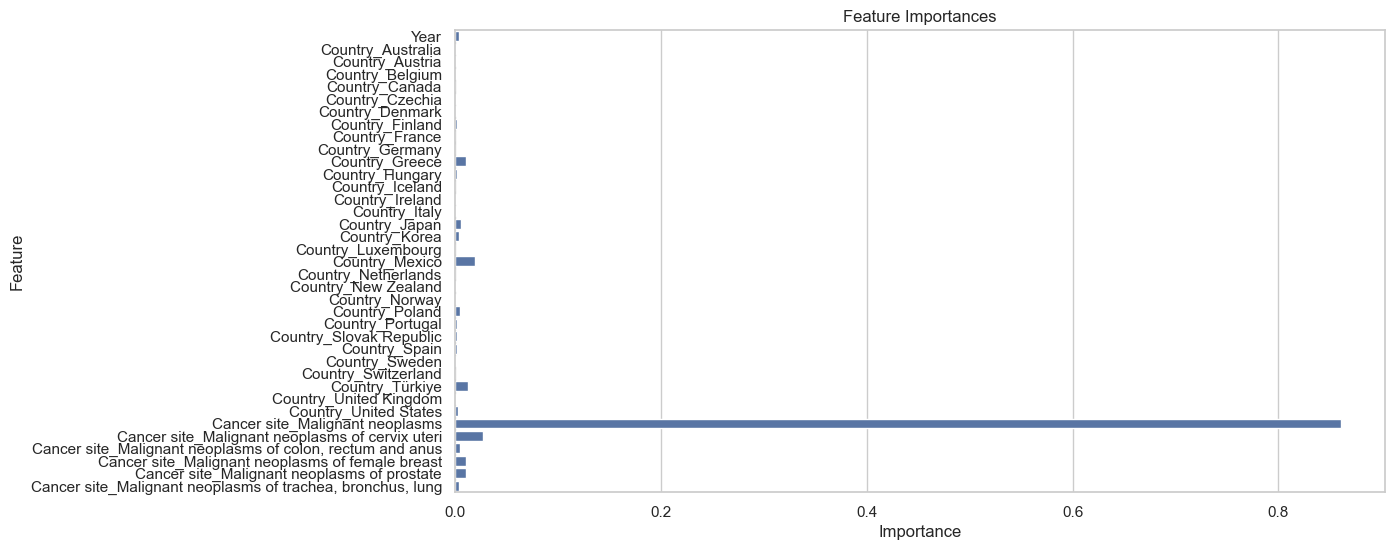

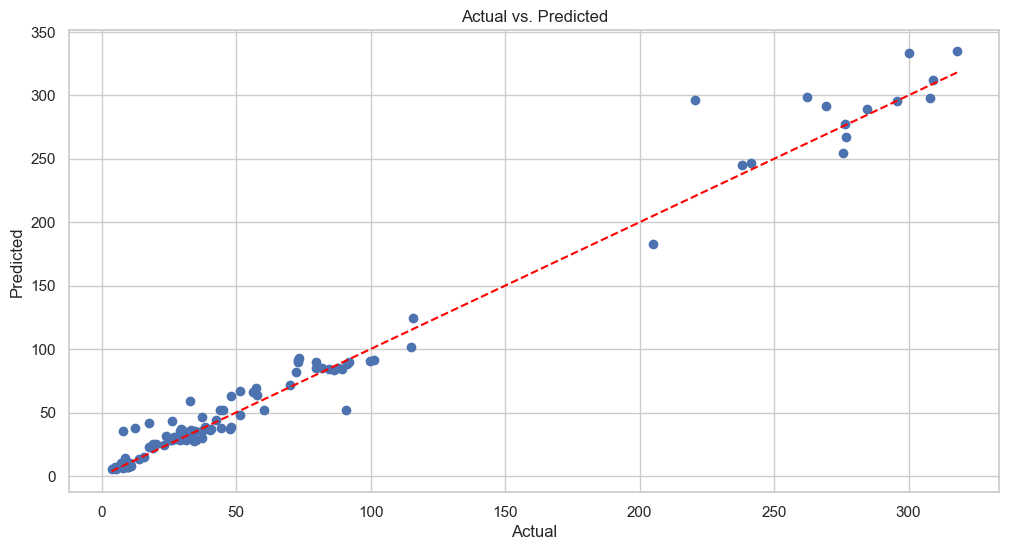

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the Random Forest Regression model 
rf.fit(X_train, y_train)

# Visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=rf.feature_importances_, y=X_train.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualize predictions
y_pred = rf.predict(X_test)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


## Revist Data: Split into two datasets to bulid two Random Forest Regression Models

In [271]:
# create malignant neoplasms dataset

cancer_type = "Malignant neoplasms"

OECD_MN = OECD_final[(OECD_final['Cancer site'] == cancer_type)]

OECD_MN.head(10)




,Country,Cancer site,Year,Cancer Rate
11,Austria,Malignant neoplasms,2002,275.5
12,Austria,Malignant neoplasms,2008,250.6
13,Austria,Malignant neoplasms,2012,254.1
22,United Kingdom,Malignant neoplasms,2002,273.6
23,United Kingdom,Malignant neoplasms,2008,269.4
24,United Kingdom,Malignant neoplasms,2012,272.9
29,Italy,Malignant neoplasms,2002,276.5
30,Italy,Malignant neoplasms,2008,274.3
31,Italy,Malignant neoplasms,2012,278.6
110,Spain,Malignant neoplasms,2002,243.4


In [272]:
#export to csv
OECD_MN.to_csv('OECD_MN.csv', index=False)

In [273]:
#create dataset that excludes malignant neoplasms

cancer_to_exclude = "Malignant neoplasms"

OECD_NOMN = OECD_final[OECD_final['Cancer site'] != cancer_to_exclude]

OECD_NOMN.head(10)

,Country,Cancer site,Year,Cancer Rate
0,Slovak Republic,Malignant neoplasms of female breast,2002,48.0
1,Slovak Republic,Malignant neoplasms of female breast,2008,53.4
2,Slovak Republic,Malignant neoplasms of female breast,2012,57.5
7,Sweden,Malignant neoplasms of female breast,2002,87.8
8,Sweden,Malignant neoplasms of female breast,2008,82.7
9,Sweden,Malignant neoplasms of female breast,2012,80.4
15,France,"Malignant neoplasms of colon, rectum and anus",2002,33.4
16,France,"Malignant neoplasms of colon, rectum and anus",2008,29.4
17,France,"Malignant neoplasms of colon, rectum and anus",2012,30.0
38,United States,Malignant neoplasms of female breast,2002,101.1


In [274]:
#export to csv 
OECD_NOMN.to_csv('OECD_NOMN.csv', index=False)